In [2]:
import glob
import os 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [3]:
from astropy.io import fits
t0 = 58854.2

os.chdir("/Users/alexgagliano/Documents/Research/2020oi/data/reference_data/bolo_stripped/SNe_Bolo_fromLyman/")
data_arr = []

for file in glob.glob("*_thesis_table"):
    data = pd.read_csv(file, delim_whitespace=True, names=['MJD', 'epoch', 'Mbol', 'minMbolErr', 'plusMbolErr', 'log10(Lbol)', 'minLbolErr', 'plusLbolErr'])
    #find peak brightness
   # data.loc[data[5] == np.nanmax(data[5]), 0]
    data['SN'] = file.strip("_thesis_table")
    #data['ph'] = data[0] - np.nanmin(data[0])
    data_arr.append(data)

#Lbol = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/scripts/superbol/superbol_output_2020oi/logL_bb_2020oi_AUBgVriz.txt")
#add the new lbol, with SBO
Lbol = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/scripts/superbol/SBO_input/superbol_output_2020oi/logL_bb_2020oi_AUBgVriz.txt", delimiter='\t', header=None, names=['MJD', 'logL', 'logLerr'])

peak = 58865
diff = peak - t0
Lbol['ph'] = Lbol['MJD'] - peak
#Lbol_prev['ph'] = Lbol_prev['MJD']

In [4]:
Lbol = Lbol[Lbol['MJD'] != 58856.0] #remove the first point
Lbol = Lbol[Lbol['MJD'] != 58856.127] #remove the second point
Lbol = Lbol[Lbol['MJD'] != 58856.253] #remove the third point
Lbol.loc[Lbol['MJD'] == 58856.38, 'logL'] = 41.6  #floor the second point

In [5]:
def t0_to_mjd(x):
    return x + t0

def mjd_to_t0(x):
    return x - t0

In [6]:
fullData = pd.concat(data_arr, ignore_index=True)

In [7]:
58865 - t0

10.80000000000291

In [8]:
MNi = {'1993J':0.06,
'1994I':0.07,#
'1996cb':0.034,#prentice
'1998bw':0.20,#
'1999dn':0.052,#prentice
'1999ex':0.106,#prentice
'2002ap':0.06,#prentice
'2003bg':0.076,#prentice
'2003jd':0.219,#prentice
'2004aw':0.22,# Caro
'2004dk':0.23,#Caro
'2004dn':0.15,#Caros
'2004fe':0.057,#upper lim, prentice
'2004ff':0.05,
'2004gq':0.14,#caro
'2005az':0.09,#
'2005bf':0.073,#
'2005hg':0.07,
'2005kz':0.45,#
'2005mf':0.04,
'2006T':0.06,
'2006aj':0.12,
'2006el':0.13,#Lyman
'2006ep':0.03,#
'2007C':0.04,#
'2007Y':0.02,#
'2007gr':0.04,
'2007ru':0.194,#prentice
'2007uy':0.14,
'2008D':0.05,#
'2008ax':0.02,
'2009bb':0.12,
'2009jf':0.12,
'2010bh':0.09,
'2011bm':0.65,#
'2011dh':0.03,
'2011hs':0.02,
'iPTF13bvn':0.06} #Lyman

Type = {'1993J':'IIb',
'1994I':'Ic',#
'1996cb':'IIb',#
'1998bw':'Ic-GRB',#
'1999dn':'Ib',#
'1999ex':'Ic',#
'2002ap':'Ic',#
'2003bg':'IIb',#
'2003jd':'Ic-BL',#
'2004aw':'Ic',#
'2004dk':'Ib',#
'2004dn':'Ic',#
'2004fe':'Ic',#
'2004ff':'IIb',
'2004gq':'Ib',#
'2005az':'Ic',#
'2005bf':'Ib',#
'2005hg':'Ib',
'2005kz':'Ic',#
'2005mf':'Ic',
'2006T':'IIb',
'2006aj':'Ic-GRB',
'2006el':'IIb',#
'2006ep':'Ib',#
'2007C':'Ib',
'2007Y':'Ib',#
'2007gr':'Ic',
'2007ru':'Ic-BL',#
'2007uy':'Ib',
'2008D':'Ib',#
'2008ax':'IIb',
'2009bb':'Ic-BL',
'2009jf':'Ib',
'2010bh':'Ic-GRB',
'2011bm':'Ic',#
'2011dh':'IIb',
'2011hs':'IIb',
'iPTF13bvn':'Ib'}

#where 1 is K&K and 2 is Arnett, and 3 is match to stellar models
Method_MNi = {'1993J':1,
'1994I':3,##
'1996cb':2,#
'1998bw':3,#
'1999dn':2,#
'1999ex':2,#
'2002ap':2,#
'2003bg':2,#
'2003jd':2,#
'2004aw':2,#
'2004dk':2,#
'2004dn':2,#
'2004fe':2,#
'2004ff':1,
'2004gq':2,#
'2005az':2,#
'2005bf':2,#
'2005hg':1,
'2005kz':2,#
'2005mf':1,
'2006T':1,
'2006aj':1,
'2006el':2,#
'2006ep':1,#
'2007C':1,
'2007Y':1,#
'2007gr':1,
'2007ru':2,#
'2007uy':1,
'2008D':1,#
'2008ax':1,
'2009bb':1,
'2009jf':1,
'2010bh':1,
'2011bm':2,#
'2011dh':1,
'2011hs':1,
'iPTF13bvn':2}

In [9]:
#Lsol = 3.83e33 # erg/s
#Msol = 4.77

#Lstar = 10**(SN1994I_bolo + SN1994I_plusErr)

#Mstar = Msol - 2.5*np.log10(Lstar/Lsol)
#Mstar_new = Mstar- 3.1*(0.16)

#Lstar_new = Lsol * 10**((Msol-Mstar_new)/2.5)

In [10]:
#add in the data from Taddia+2018
taddia_files = glob.glob("/Users/alexgagliano/Documents/Research/2020oi/data/reference_data/BOLOtxt_kcorr_newext/*")
taddia_LCs = []
for file in taddia_files:
    taddia_LCs.append(pd.read_csv(file, header=None, names=['phase', 'Lbol'], delim_whitespace=True))

In [11]:
for i in np.arange(len(taddia_LCs)):
    LC = taddia_LCs[i]
    if np.sum(np.log10(LC['Lbol'].values)>43) ==0:
        print(i)
        #print(LC)

0
1
2
3
4
5
6
7
8
9
10
11
13
14
16
17
18
20
21
22
24
25
26
27
29
30
31


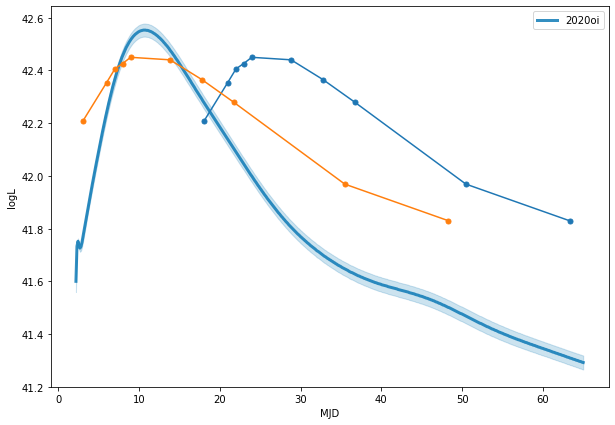

In [12]:
plt.figure(figsize=(10,7))
sns.lineplot(x=Lbol['MJD']-t0, y=Lbol['logL'], lw=3, alpha=0.8,color=sns.color_palette("colorblind", 10)[0], ls='-', label=r'2020oi')
plt.fill_between(Lbol['MJD']-t0, Lbol['logL']-Lbol['logLerr']/4.,Lbol['logL']+Lbol['logLerr']/4., color=sns.color_palette("colorblind", 10)[0], alpha=0.2)
#shifts = [10, 10, 11, 1, 6.5, 10, -5, 8, 5, 9, 0.5, 0, 2, 7, 0, 1, 1, 15, 0, 8.5, 8.5, 14, 14, 8, 6.8, 6.8, 0, 2, -5, 0, 0,9, 0, 0,0, 0, 0,0, 0, 0]
for i in [17]:
    name = taddia_files[i].split("/")[-1].split("_")[1]
    LC = taddia_LCs[i]
    if np.sum(np.log10(LC['Lbol'].values)>50) ==0:
        plt.plot(LC['phase'], np.log10(LC['Lbol'].values), 'o-', ms=5, label=name)
        plt.plot(LC['phase']-15, np.log10(LC['Lbol'].values), 'o-', ms=5, label=name)
    #m+=1 
    break

In [13]:
taddia_files[16]

'/Users/alexgagliano/Documents/Research/2020oi/data/reference_data/BOLOtxt_kcorr_newext/Bolo_SN2004gq_FITZ.txt'

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: All-NaN axis encountered
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: All-NaN axis encountered
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: All-NaN axis encountered


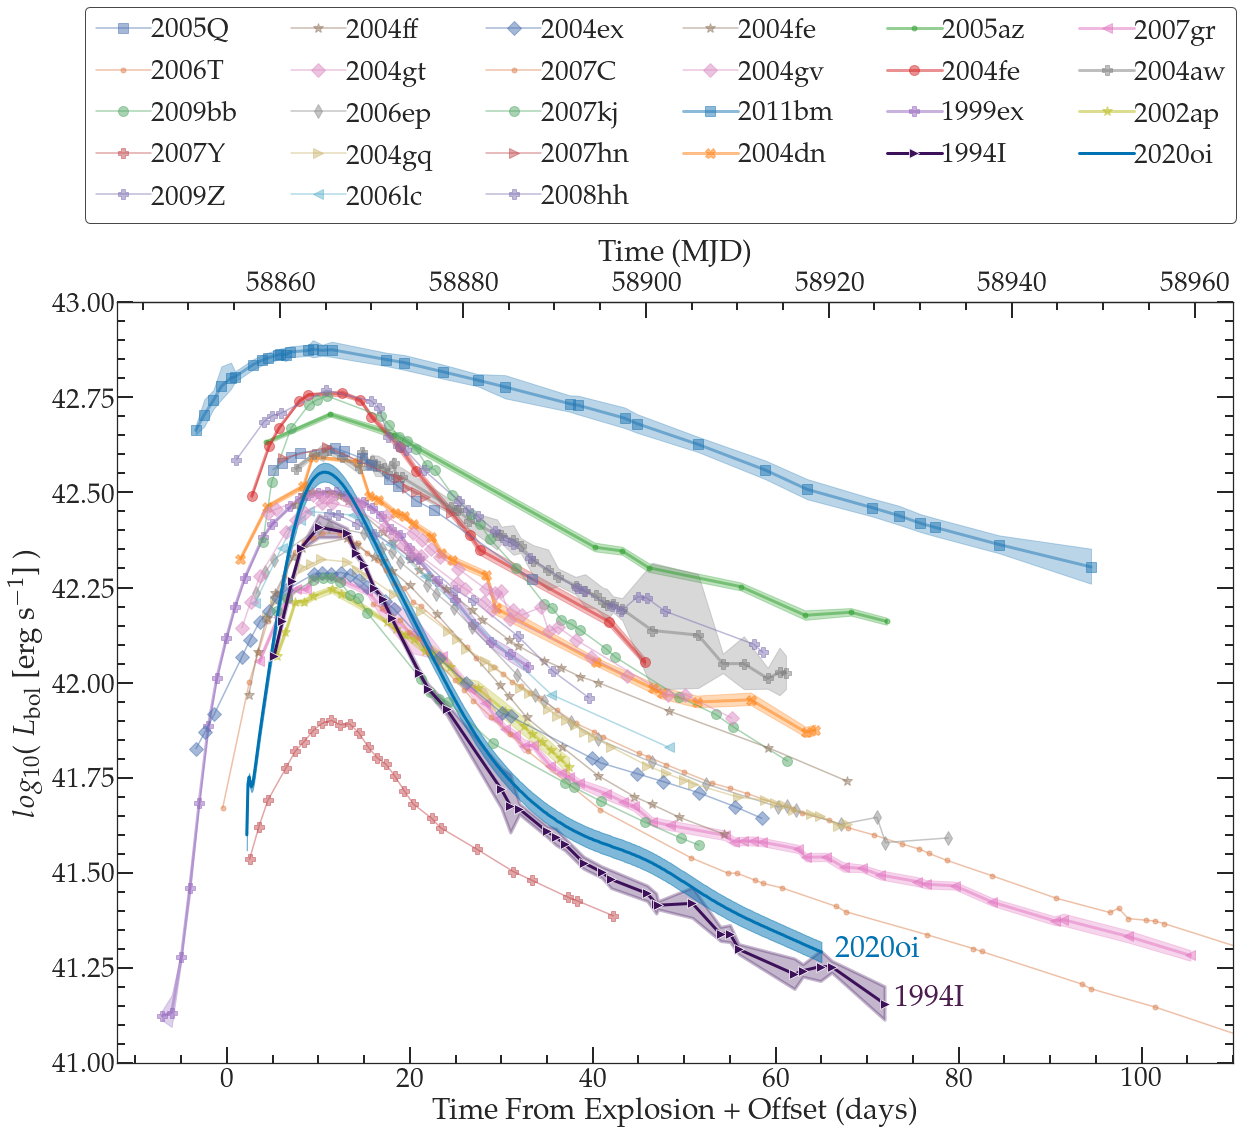

In [14]:
#files corrupted were SN2007rz, SN2009dt, SN2006bf, and SN2007ag

os.chdir("/Users/alexgagliano/Documents/Research/2020oi/data/reference_data/bolo_stripped/SNe_Bolo_fromLyman/")

GP_results_wQ = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/scripts/superbol/superbol_output_2020oi/logL_bb_2020oi_AUBgVriz.txt")
GP_results_Great = GP_results_wQ[GP_results_wQ['Quality']=='Great']

SNe = []
sns.set_style("white")
#sns.set_context("poster")
sns.set(font_scale=2.5)
sns.set_style("white")
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 40})
sns.set_style("ticks", {"xtick.minor.size": 8, "ytick.minor.size": 8})

plt.figure(figsize=(20,14))
plt.rcParams['xtick.major.size'] = 16
plt.rcParams['ytick.major.size'] = 16

plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.minor.size'] = 8
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.major.top'] = False
plt.rcParams['xtick.minor.top'] = False
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

phases = []
lbol = []
nickel = []
types = []
method = []

cols = sns.color_palette("colorblind", 10)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
    
fullData = pd.DataFrame({'MJD':np.array([]), 'epoch':np.array([]), 'Mbol':np.array([]), 'minMbolErr':np.array([]), 'plusMbolErr':np.array([]), 'log10(Lbol)':np.array([]), 'minLbolError':np.array([]), 'plusLbolError':np.array([]), 'SN':np.array([])})
i = -1
markers = np.array(['s','X', '.', 'o', 'P', '>', '<', 'P', '*', 'D', 'd'])
j = -1
peak_errL = []
peak_errH = []
shifts = [10, 10, 11, 1, 6.5, 10, -5, 8, 5, 9, 0.5, 0, 2, 7, 0, 1, 1, 15, 0, 8.5, 8.5, 14, 14, 8, 6.8, 6.8, 0, 2, -5, 0, 0,9, 0, 0,0, 0, 0,0, 0, 0]

m = 0
for LC in taddia_LCs:
    name = taddia_files[m].split("/")[-1].split("_")[1]
    if np.sum(np.log10(LC['Lbol'].values)>50) ==0:
        if name not in np.array(['SN2006fo', 'SN2009K', 'SN2008gc', 'SN2006ba', 'SN2006ir', 'SN2008aq', 'SN2005em', 'SN2005aw','SN2004ew', 'SN2009ca', 'SN2005bj']):
            plt.plot(LC['phase']-shifts[m], np.log10(LC['Lbol'].values), marker=markers[m%11], ms=10, alpha=0.5, label=name[2:])
    m+=1 

#plt.plot(LC['phase'], np.log10(LC['Lbol']))
c = np.concatenate([sns.color_palette("tab10"), sns.color_palette("Set2")])

for file in glob.glob("*_thesis_table"):
    data = pd.read_csv(file, delim_whitespace=True, names=['MJD', 'epoch', 'Mbol', 'minMbolErr', 'plusMbolErr', 'log10(Lbol)', 'minLbolErr', 'plusLbolErr'])
    #find peak brightness
    data['SN'] = file.split("_")[0]
    fullData = pd.concat([fullData, data], ignore_index=True)
    data_arr.append(data)
    SNe.append(data['SN'].values[0])
    if data['SN'].values[0] in ['1994I']:
        i+=1 
        sns.lineplot(x=data['epoch']+diff, y=data['log10(Lbol)'],markers=True, ms=10, lw=3, err_style='band', marker=markers[i], color='#3D105A', label=data['SN'].values[0], zorder=1000)
        plt.fill_between(data['epoch']+diff, data['log10(Lbol)']+data['minLbolErr'], data['log10(Lbol)'] + data['plusLbolErr'],color='#3D105A',  alpha=0.3, lw=3)
        SN1994I_date = data['epoch']+diff
        SN1994I_bolo = data['log10(Lbol)']
        SN1994I_minErr = data['minLbolErr']
        SN1994I_plusErr = data['plusLbolErr']
    elif Type[data['SN'].values[0]] == 'Ic':
        if data['SN'].values[0] not in ['2005mf', '2005kz']:
            i+=1 
            plt.plot(data['epoch']+diff, data['log10(Lbol)'],label=data['SN'].values[0], ms=10, marker=markers[i],ls='-', zorder=1, lw=3, alpha=0.5, color=c[i]) #c=cols[j], ls='-', zorder=1, lw=3, alpha=0.5)
            plt.fill_between(data['epoch']+diff, data['log10(Lbol)']+data['minLbolErr'], data['log10(Lbol)'] + data['plusLbolErr'], alpha=0.3, color=c[i]) #color=cols[j], alpha=0.3)
#            print(np.nanmax(data['log10(Lbol)']))
    peak = np.abs(data['log10(Lbol)'] - np.nanmax(data['log10(Lbol)'])) < 0.001
    peak_errL.append(data['minLbolErr'].values[peak])
    peak_errH.append(data['plusLbolErr'].values[peak])    
    lbol.append(data['log10(Lbol)'].values)
    phases.append(data['epoch'].values)
    nickel.append(MNi[data['SN'].values[0]])
    types.append(Type[data['SN'].values[0]])
    method.append(Method_MNi[data['SN'].values[0]])
        
#SNe = np.sort(SNe)
#for SN in SNe:
#    print("'%s':,"%SN)
#plt.plot(Lbol['ph'], Lbol['logL'], c='k', label='')
#plt.errorbar(Lbol['ph']-peak20oi, np.log10(Lbol['L+BB']), Lbol['GP_Err'], fmt='o', lw=1, markersize=4, c='k',zorder=1000)
sns.lineplot(x=Lbol['MJD']-t0, y=Lbol['logL'], lw=3, alpha=1,color=sns.color_palette("colorblind", 10)[0], ls='-', label=r'2020oi')
plt.fill_between(Lbol['MJD']-t0, Lbol['logL']-Lbol['logLerr']/4.,Lbol['logL']+Lbol['logLerr']/4., color=sns.color_palette("colorblind", 10)[0], alpha=0.5)
#plt.plot(GP_results_Great['MJD']-t0, GP_results_Great['logL'], 'o', ms=11,color='#00916E')

plt.xlim((-12, 110))
plt.ylim((41, 43))
#plt.legend().set_visible(False)
plt.xlabel("Time From Explosion + Offset (days)")
plt.ylabel(r"$log_{10}$( $L_{\rm bol}$ [erg s$^{-1}$] )", labelpad=10)

plt.text(73, 41.15, "1994I", c='#4C1E4F')
plt.text(66.5, 41.28, "2020oi", c=sns.color_palette("colorblind", 10)[0])
#plt.text(97, 41.4, "2007gr", c='gray')
#plt.text(37, 41.83, "2002ap", c='gray')
#plt.text(-3, 41.25, "1999ex", c='gray')
#plt.text(67, 41.75, "2005mf", c='gray')
#plt.text(63, 42., "2004aw", c='gray')
#plt.text(65, 42.23, "2005az", c='gray')
#plt.text(35, 42.55, "2005kz", c='gray')
#plt.text(85, 42.42, "2011bm", c='gray')
#plt.text(-8.5, 42.4, "2004dn", c='gray')
#plt.text(-7, 42.55, "2004fe", c='gray')

absMJD = plt.gca().secondary_xaxis('top', functions=(t0_to_mjd, mjd_to_t0))
absMJD.set_xlabel('Time (MJD)', labelpad=10)

plt.legend(loc='lower right', handletextpad=0.0, borderaxespad=1.5,labelspacing=0.5, bbox_to_anchor=(1.04,1.05), ncol=6,frameon=True, fancybox=True, edgecolor='k')

plt.savefig("/Users/alexgagliano/Documents/Research/2020oi/img/BolometricLCs_2020oi_IcOnly_FancyFont_SBO_wTaddiaFull.png",dpi=300, bbox_inches='tight')

In [15]:
len(SNe)
len(peak_errL)
peak_errL

[array([0.014]),
 array([0.024, 0.021]),
 array([0.006]),
 array([0.003, 0.002]),
 array([0.011]),
 array([0.005]),
 array([0.012]),
 array([0.007]),
 array([], dtype=float64),
 array([0.017]),
 array([0.024]),
 array([0.011]),
 array([0.008]),
 array([0.011]),
 array([], dtype=float64),
 array([0.016]),
 array([0.006]),
 array([0.011]),
 array([0.003]),
 array([0.007]),
 array([0.008]),
 array([0.004, 0.004]),
 array([0.032]),
 array([0.004]),
 array([0.023]),
 array([], dtype=float64),
 array([0.005, 0.006]),
 array([0.02]),
 array([0.011]),
 array([0.003]),
 array([0.006]),
 array([0.016]),
 array([0.013]),
 array([0.009]),
 array([0.006]),
 array([0.009]),
 array([0.005]),
 array([0.014])]

In [ ]:
for i in np.arange(len(lbol)):
    if len(lbol[i][(np.abs(phases[i] - 30) < 4)]) > 0:
        print(lbol[i][(np.abs(phases[i] - 30) < 4)][0])
    

In [ ]:
DF_1994I = pd.DataFrame({'epoch':SN1994I_date,'Lbol':SN1994I_bolo, 'mErr': SN1994I_minErr, 'pErr':SN1994I_plusErr})
DF_1994I.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/reference_data/SN1994I_Lbol.csv",index=False)

In [ ]:
day30 = [42.426,
42.733000000000004,
41.923,
42.568000000000005,
41.813,
42.055,
41.783,
41.915,
41.438,
41.968999999999994,
42.18600000000001,
42.114,
42.019,
41.501000000000005,
41.528999999999996,
42.356,
42.16,
41.575,
42.192,
42.461999999999996,
41.753,
42.255,
42.227,
41.778,
42.059,
42.195,
42.273,
42.653999999999996]


In [ ]:
np.mean(day30) - np.std(day30)

In [ ]:
day30_2020oi = 41.775

In [ ]:
Lbol[np.abs(Lbol['MJD']-t0-30)<1]

In [ ]:
(np.abs(phases[i] - 30) < 0.5)

In [ ]:
np.nanmax(SN1994I_bolo)

In [ ]:
10**np.nanmax(SN1994I_bolo)

In [ ]:
10**np.nanmax(Lbol['logL']) /10**np.nanmax(SN1994I_bolo)

In [ ]:
3.5727283815192663e+42 - 2.564484036517711e+42

In [ ]:
np.nanmax(Lbol['logL']) 

In [ ]:
peaks = [42.876000000000005,
42.593999999999994,
42.705,
42.76,
42.501000000000005,
42.277,
42.611999999999995,
42.245,
42.674,
42.915]

In [ ]:
np.nanmean(peaks) - 0.3*np.std(peaks)

In [ ]:
42.547 - 42.409

In [ ]:
AllSNe = pd.DataFrame({'Lbol':lbol, 'phase':phases, 'nickel':nickel, 'type':types, 'method':method})

In [ ]:
np.unique(AllSNe['type'])

In [ ]:
SNe_Ic = AllSNe[AllSNe['type'].isin(['Ic'])]
SNe_IcBL = AllSNe[AllSNe['type'].isin(['Ic-BL'])]
SNe_IcGRB = AllSNe[AllSNe['type'].isin(['Ic-GRB'])]
SNe_IIb = AllSNe[AllSNe['type'].isin(['IIb'])]
SNe_Ib = AllSNe[AllSNe['type'].isin(['Ib'])]

In [ ]:
DF_20oi = pd.DataFrame({'phase':[Lbol['ph']], 'Lbol':[Lbol['logL']], 'nickel':0.07, 'type':['Ic']})

In [ ]:
AllSNe = pd.concat([DF_20oi, AllSNe],ignore_index=True)

In [ ]:
AllSNe_KK = AllSNe[AllSNe['method'] == 1]

In [ ]:
import matplotlib 

#lowNi_SNe = AllSNe[lowNi]
#medNi_SNe = AllSNe[medNi]
#highNi_SNe = AllSNe[highNi]

pl = sns.color_palette("crest", as_cmap=True)
sns.set_context("talk")
plt.figure(figsize=(30,14))
ml = multiline(AllSNe['phase'], AllSNe['Lbol'], AllSNe['nickel'], lw=4, cmap=pl,norm=matplotlib.colors.LogNorm())
sns.lineplot(x=Lbol['ph'], y=Lbol['logL'], lw=3, color='k', alpha=1)
# colorbar
sm = plt.cm.ScalarMappable(cmap=pl, norm=plt.Normalize(vmin=np.nanmin(AllSNe['nickel']), vmax=np.nanmax(AllSNe['nickel'])))
sm._A = [];
plt.xlabel("Phase From Bolometric Peak (days)")
plt.ylabel(r"log10($L_{bol}$)")
cbar = plt.colorbar(sm)
cbar.set_label(r"$M_{Ni56}$")
plt.savefig("/Users/alexgagliano/Documents/Research/2020oi/img/Lbol_w_MNi.png")

In [ ]:
# ### note yet working####
###sns.set_context("talk")
t0 = 58854.2

plt.figure(figsize=(10,7))
os.chdir("/Users/alexgagliano/Documents/Research/2020oi/data/bolo_stripped/SNe_Ibc_Bolo_fromCano/")

for file in glob.glob("*"):
    print(file)
    if file[-1] is not 'g':
        data = pd.read_csv(file, delim_whitespace=True, names=['t-tExp', 'Lbol(erg/s)'])
        #find peak brightness
        data['SN'] = file
        data_arr.append(data)

        sns.lineplot(x=data['t-tExp'], y=np.log10(data['Lbol(erg/s)'].astype("float")), ms=1, alpha=0.8,err_style='band', label=file)
       # plt.fill_between(data['epoch'], data['log10(Lbol)']+data['minLbolErr'],data['log10(Lbol)']+data['plusLbolErr'], alpha=0.2)

        #plt.errorbar(Lbol['ph']-peak20oi, np.log10(Lbol['L+BB']), Lbol['GP_Err'], fmt='o', lw=1, markersize=4, c='k',zorder=1000)
sns.lineplot(x=Lbol['ph']-t0, y=np.log10(Lbol['L+BB']), ms=1, alpha=0.8,color='k', label='2020oi')
#plt.fill_between(Lbol['ph']-peak20oi+10, np.log10(Lbol['L+BB'])-Lbol['GP_Err']/2.,np.log10(Lbol['L+BB'])+Lbol['GP_Err']/2., alpha=0.2,color='k')
plt.fill_between(Lbol['ph']-peak20oi+10, np.log10(Lbol['L+BB'])-Lbol['GP_Err']/2,np.log10(Lbol['L+BB'])+Lbol['GP_Err']/2, alpha=0.2,color='k', label='2020oi')

plt.xlim((-2, 55))
plt.legend()
plt.xlabel("Days from Explosion Time")
plt.ylabel("log10(Lbol)")
plt.title("Cano LCs")
plt.savefig("Bolometric_Ibc_LCs_2020oi.png",dpi=300, bbox_inches='tight')
#plt.gca().get_legend().remove()

In [ ]:
#94I extinction 
plt.figure(figsize=(10,7))
sns.lineplot(x=Lbol['MJD']-t0, y=Lbol['logL'], lw=3, alpha=0.8,color=sns.color_palette("colorblind", 10)[0], ls='-', label=r'2020oi')
plt.fill_between(Lbol['MJD']-t0, Lbol['logL']-Lbol['logLerr']/4.,Lbol['logL']+Lbol['logLerr']/4., color=sns.color_palette("colorblind", 10)[0], alpha=0.2)

plt.plot(SN1994I_date, np.log10(Lstar), 'o', label="Reported 94I")
plt.plot(SN1994I_date, np.log10(Lstar_new), 'o', label='Slightly higher extinction 94I')
plt.legend()